In [1]:
# Importing all the important libraries for this lab :
import tensorflow as tf # This library is used for Machine Learning related coding
from tensorflow import keras # Specifically used to work with Neural Networks
from tensorflow.keras import layers # Layer is the building block for a neural network
import numpy as np # This lib. is imported to use functions like summation and linear algebric functions
import pandas as pd # This lib. is used for Data analysis (Arrays in our case)
import matplotlib.pyplot as plt # for plotting # Used for plotting


In [2]:
#Q1. Write a function to create x and y values that follows the given function above. Provide initial plot of the function.
def XYFunc(n): # 'n' is the number of values to be generated
  x = np.random.uniform(-1.0, 1.0, n) # Here 'n' values for x between -1 and 1
  y = 0.2*x**4 + 2*x**3 + 0.1*x**2 + 10 # generate corresponding y values
  data_dic = {"x": x, "y": y} # create a data dictionary for x and y
  df = pd.DataFrame(data_dic) # convert the data dictionary into a dataframe
  return (df)
df= XYFunc(30000)

In [3]:
# df --> It is the dataframe that contains x and y as the output of our functions
# Initial PLot
def XYplot(df, title, xlabel, ylabel):
  plt.scatter(mydf['x'],mydf['y'])
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

In [4]:
#Q2. Write a function that accepts an argument to indicate shuffling. Based on the argument, function has to return the shuffled data or data without shuffling.
def get_dataset (argument):
  df = XYFunc(30000) # Takes the 30000 samples and shuffles them by taking an argument 
  if (argument == True):
    df = df.sample(frac=1) #Here, frac returns a boolean value
  return df
  df=get_dataset(argument== True) 

In [4]:
# Write a function to split the data into train, validation, and test sets. The function should be able to accept the data and ratios of train, validation, and test data.
def splitData (df, train_r, valid_r, test_r): # Takes 3 parameters to train test and validate our data by splitting them into 3 arrays
  
  train_df = df.sample(frac=train_r) # Assigning a sample from original data
  # Drops all the samples generated for training and validation respectively and then Assigns a sample from the remaining data
  df = df.drop(train_df.index) 
  valid_df = df.sample(frac=valid_r) 
  df = df.drop(valid_df.index) 
  test_df = df # This dataframe gives us the remaining rows 

  return train_df,valid_df, test_df # Three dataframes with shape : 9000/4200/16800

In [5]:
# Mean Absoulte Error implementation 
def mae(actual, predicted):
  sum_error = 0.0 # Initialize the sum with 0
  for i in range(len(actual)): # For loop to traverse through the array of data stored which is being tested (x_test or y_test) 
      sum_error += abs(predicted[i] - actual[i]) 
      mae_error = sum_error / float(len(actual))
  return mae_error


In [6]:
# MSE implementation 
def mse(actual, predicted): 
  sum_error = 0.0
  for i in range(len(actual)):
    prediction_error = predicted[i] - actual[i]
    sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
  return mean_error

In [7]:
# RMSE implementation
# Calculate root mean squared error
def rmse(actual, predicted):
	sum_error = 0.0
	for i in range(len(actual)):
		prediction_error = predicted[i] - actual[i]
		sum_error += (prediction_error ** 2)
	mean_error = sum_error / float(len(actual))
	return (mean_error)**0.5

In [8]:
# r2_square implementation
def r2_square(actual, predicted):
  var1 = 0 # Total Variance by model
  var2 = 0 # Total Variance 
  r2s = 1
  for i in range(len(actual)):
    var1 += ((predicted[i] - actual[i]) **2)
    var2 += ((actual[i] - np.mean(actual))**2)
  return (r2s - var1/var2)

In [28]:
# Scaling implementation
# scaling is: (x - min(x))/(max(x) - min(x))
def scaleData(df):
  xstd = (df['x']-min(df['x']))/(max(df['x'])-min(df['x'])) # Defined w.r.t the formula 
  # Store the standardized values back in the dataframe
  df['x'] = xstd
  return df
df=scaleData(df)

In [29]:
train_df,valid_df, test_df=splitData (df, 0.3, 0.2, 0.5)
# Gives us the 6 datasets (3 for X and 3 for Y ) 

In [30]:
x_train = train_df.iloc[:, 0]
x_train

11150    0.456518
17418    0.293384
8836     0.775915
3286     0.212595
17507    0.149143
           ...   
2460     0.456917
12216    0.223026
7492     0.865267
27238    0.555956
12901    0.310084
Name: x, Length: 9000, dtype: float64

In [31]:
x_test = test_df.iloc[:, 0]
x_test


2        0.807103
3        0.213354
6        0.254889
9        0.460491
11       0.268781
           ...   
29994    0.337026
29996    0.908046
29997    0.376885
29998    0.291001
29999    0.568771
Name: x, Length: 16800, dtype: float64

In [32]:
x_valid = valid_df.iloc[:, 0]
x_valid

26776    0.054924
9454     0.983559
26956    0.186457
18271    0.478594
17856    0.749276
           ...   
15979    0.690865
4156     0.764874
23909    0.741586
9832     0.445438
20690    0.140962
Name: x, Length: 4200, dtype: float64

In [33]:
y_train = train_df.iloc[:,-1:]
y_train

,y
11150,9.999455
17418,9.881905
8836,10.385040
3286,9.675320
17507,9.407159
...,...
2460,9.999476
12216,9.709812
7492,10.889896
27238,10.004092


In [34]:
y_test = test_df.iloc[:,-1:]
y_test

,y
2,10.529529
3,9.677917
6,9.800157
9,9.999647
11,9.832914
...,...
29994,9.943692
29996,11.242070
29997,9.976975
29998,9.877639


In [35]:
y_valid = valid_df.iloc[:,-1:]
y_valid

,y
26776,8.795027
9454,12.077046
26956,9.577423
18271,10.000027
17856,10.285027
...,...
15979,10.130077
4156,10.341114
23909,10.259831
9832,9.998625


(9000, 2) (4200, 2) (16800, 2)


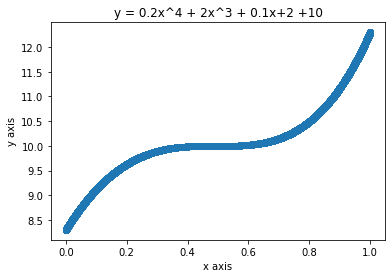

In [17]:
mydf = get_dataset(True)
scaled_data = scaleData(mydf)
train_data, validation_data,test_data = splitData(scaled_data, 0.3, 0.2, 0.5)
print(train_data.shape, validation_data.shape, test_data.shape)
XYplot(scaled_data, "y = 0.2x^4 + 2x^3 + 0.1x+2 +10", "x axis", "y axis")

In [36]:
# Three structures to accomodate our 10 cases, each model/structure has its own number of layers and activation function
def model1():
    model1 = keras.Sequential([
    layers.Dense(12, activation = 'relu', input_shape = [len(x_train), 1]),
    layers.Dense(8, activation = 'relu'),
    layers.Dense(4, activation = 'relu'),
    layers.Dense(1)
])
    model1.compile(loss='mse', optimizer = 'adam', metrics = ['mse'])
    return model1





In [20]:
def model2():
  model2 = keras.Sequential([
        layers.Dense(24, activation = 'relu', input_shape = [len(x_train), 1]),
        layers.Dense(1)
  ])
  model2.compile(loss = 'mse', optimizer = 'adam', metrics=['mse'])
  return model2

In [41]:
def model3():
    model3 = keras.Sequential([
    layers.Dense(12, activation = 'tanh', input_shape = [len(x_train), 1]),
    layers.Dense(8, activation = 'tanh'),
    layers.Dense(4, activation = 'tanh'),
    layers.Dense(1)
])
    model3.compile(loss='mse', optimizer = 'adam', metrics = ['mse'])
    return model3

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 23.8425 - mse: 23.8425 - val_loss: 0.2964 - val_mse: 0.2964
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 0.1332 - mse: 0.1332 - val_loss: 0.0565 - val_mse: 0.0565
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0443 - mse: 0.0443 - val_loss: 0.0394 - val_mse: 0.0394
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0354 - mse: 0.0354 - val_loss: 0.0315 - val_mse: 0.0315
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0251 - mse: 0.0251 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 8/20
750/750 [==============================] - 1s 2ms/step - loss: 

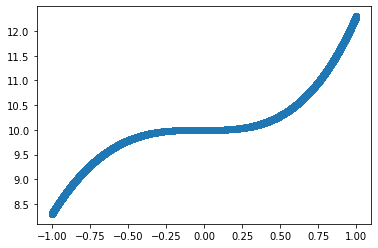

In [18]:
#Case1
case_one = model1()
case_one.fit(x_train, y_train, epochs = 20, batch_size = 12, validation_data = (x_valid,y_valid))
xpredict = case_one.predict(x_test) #.reshape(16800)
plt.scatter(x_test,y_test)


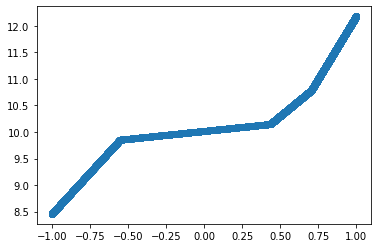

In [19]:
plt.scatter(x_test,xpredict.reshape(16800))


In [20]:
y_test=y_test.to_numpy()
y_test=y_test.reshape(16800)
mae(y_test, xpredict.reshape(16800)),mse(y_test, xpredict.reshape(16800)),rmse(y_test,xpredict.reshape(16800)),r2_square(y_test,xpredict.reshape(16800))

(0.038485976492211416,
 0.002282119442128832,
 0.047771533805487466,
 0.9961378376845187)

Epoch 1/20
750/750 [==============================] - 1s 1ms/step - loss: 48.5165 - mse: 48.5165 - val_loss: 2.5253 - val_mse: 2.5253
Epoch 2/20
750/750 [==============================] - 1s 1ms/step - loss: 0.3375 - mse: 0.3375 - val_loss: 0.0958 - val_mse: 0.0958
Epoch 3/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0878 - mse: 0.0878 - val_loss: 0.0798 - val_mse: 0.0798
Epoch 4/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0689 - mse: 0.0689 - val_loss: 0.0607 - val_mse: 0.0607
Epoch 5/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0541 - mse: 0.0541 - val_loss: 0.0504 - val_mse: 0.0504
Epoch 6/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0464 - mse: 0.0464 - val_loss: 0.0445 - val_mse: 0.0445
Epoch 7/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0401 - mse: 0.0401 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 8/20
750/750 [==============================] - 1s 1ms/step - loss: 

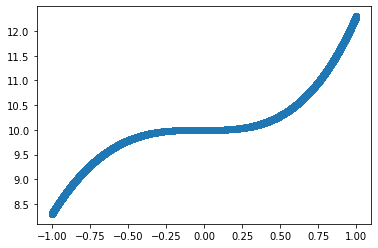

In [22]:
#Case 2
case_two = model2()
case_two.fit(x_train, y_train, epochs = 20, batch_size = 12, validation_data = (x_valid,y_valid))
xpredict = case_two.predict(x_test) #.reshape(16800)
plt.scatter(x_test,y_test)

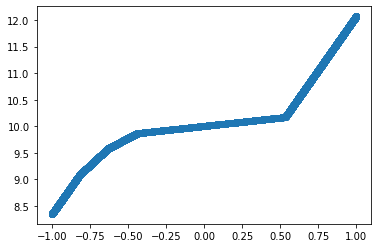

In [23]:
plt.scatter(x_test,xpredict.reshape(16800))

In [25]:
#y_test=y_test.to_numpy()
y_test=y_test.reshape(16800)
mae(y_test, xpredict.reshape(16800)),mse(y_test, xpredict.reshape(16800)),rmse(y_test,xpredict.reshape(16800)),r2_square(y_test,xpredict.reshape(16800))

(0.038642019567085864,
 0.0030049478919234127,
 0.05481740500902439,
 0.9949145534217326)

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 44.5353 - mse: 44.5353 - val_loss: 18.9170 - val_mse: 18.9170
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 9.9171 - mse: 9.9171 - val_loss: 4.0708 - val_mse: 4.0708
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 2.0036 - mse: 2.0036 - val_loss: 0.8948 - val_mse: 0.8948
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.6743 - mse: 0.6743 - val_loss: 0.5776 - val_mse: 0.5776
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 0.5542 - mse: 0.5542 - val_loss: 0.3592 - val_mse: 0.3592
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 0.2681 - mse: 0.2681 - val_loss: 0.2112 - val_mse: 0.2112
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 0.1602 - mse: 0.1602 - val_loss: 0.1095 - val_mse: 0.1095
Epoch 8/20
750/750 [==============================] - 1s 2ms/step - loss

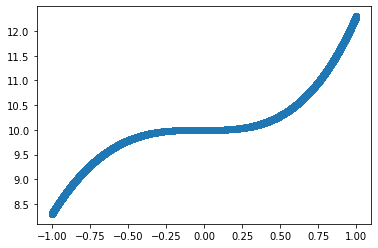

In [27]:
#Case 3
case_three = model3()
case_three.fit(x_train, y_train, epochs = 20, batch_size = 12, validation_data = (x_valid,y_valid))
xpredict = case_three.predict(x_test) #.reshape(16800)
plt.scatter(x_test,y_test)

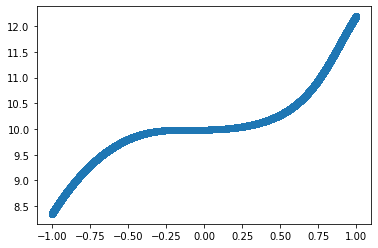

In [28]:
plt.scatter(x_test,xpredict.reshape(16800))

In [30]:
#y_test=y_test.to_numpy()
y_test=y_test.reshape(16800)
mae(y_test, xpredict.reshape(16800)),mse(y_test, xpredict.reshape(16800)),rmse(y_test,xpredict.reshape(16800)),r2_square(y_test,xpredict.reshape(16800))

(0.013625749671120733,
 0.0003338696075568513,
 0.01827209915573061,
 0.9994349732127132)

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 22.4758 - mse: 22.4758 - val_loss: 0.7328 - val_mse: 0.7328
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 0.3375 - mse: 0.3375 - val_loss: 0.1322 - val_mse: 0.1322
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 0.1032 - mse: 0.1032 - val_loss: 0.0921 - val_mse: 0.0921
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0928 - mse: 0.0928 - val_loss: 0.0894 - val_mse: 0.0894
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0913 - mse: 0.0913 - val_loss: 0.0900 - val_mse: 0.0900
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0909 - mse: 0.0909 - val_loss: 0.0876 - val_mse: 0.0876
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0900 - mse: 0.0900 - val_loss: 0.0866 - val_mse: 0.0866
Epoch 8/20
750/750 [==============================] - 1s 2ms/step - loss: 

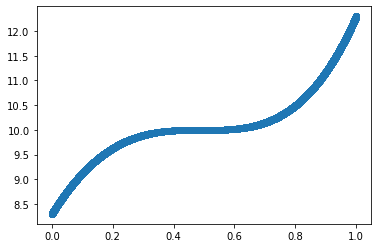

In [40]:
#Case 4
case_four = model1()
case_four.fit(x_train, y_train, epochs = 20, batch_size = 12, validation_data = (x_valid,y_valid))
xpredict = case_four.predict(x_test) #.reshape(16800)
plt.scatter(x_test,y_test)

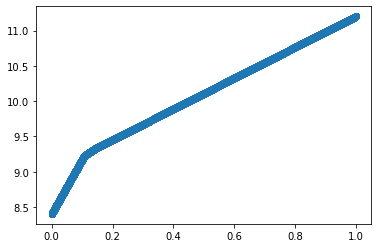

In [41]:
plt.scatter(x_test,xpredict.reshape(16800))

In [42]:
y_test=y_test.to_numpy()
y_test=y_test.reshape(16800)
mae(y_test, xpredict.reshape(16800)),mse(y_test, xpredict.reshape(16800)),rmse(y_test,xpredict.reshape(16800)),r2_square(y_test,xpredict.reshape(16800))

(0.22501245500398998,
 0.08667394571455828,
 0.2944043914661571,
 0.8505496821061056)

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 37.4358 - mse: 37.4358 - val_loss: 16.1076 - val_mse: 16.1076
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 8.3365 - mse: 8.3365 - val_loss: 3.3181 - val_mse: 3.3181
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 1.6574 - mse: 1.6574 - val_loss: 0.7878 - val_mse: 0.7878
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.6435 - mse: 0.6435 - val_loss: 0.5755 - val_mse: 0.5755
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 0.5791 - mse: 0.5791 - val_loss: 0.5592 - val_mse: 0.5592
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 0.3973 - mse: 0.3973 - val_loss: 0.2217 - val_mse: 0.2217
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 0.1955 - mse: 0.1955 - val_loss: 0.1668 - val_mse: 0.1668
Epoch 8/20
750/750 [==============================] - 1s 2ms/step - loss

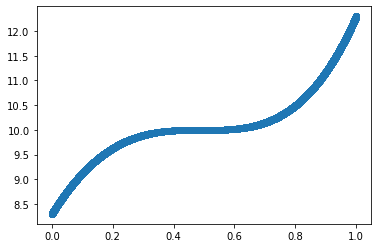

In [44]:
#Case 5
case_five = model3()
case_five.fit(x_train, y_train, epochs = 20, batch_size = 12, validation_data = (x_valid,y_valid))
xpredict = case_five.predict(x_test) #.reshape(16800)
plt.scatter(x_test,y_test)

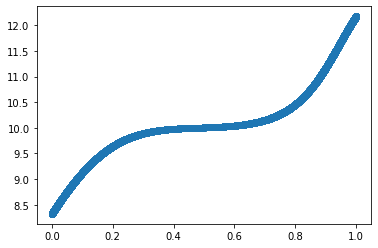

In [45]:
plt.scatter(x_test,xpredict.reshape(16800))

In [47]:
#y_test=y_test.to_numpy()
y_test=y_test.reshape(16800)
mae(y_test, xpredict.reshape(16800)),mse(y_test, xpredict.reshape(16800)),rmse(y_test,xpredict.reshape(16800)),r2_square(y_test,xpredict.reshape(16800))

(0.013380657503314849,
 0.00036781961983189054,
 0.019178624033853172,
 0.9993657752781612)

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 94.9395 - mse: 94.9395 - val_loss: 87.7087 - val_mse: 87.7087
Epoch 2/20
750/750 [==============================] - 1s 1ms/step - loss: 81.3533 - mse: 81.3533 - val_loss: 74.8692 - val_mse: 74.8692
Epoch 3/20
750/750 [==============================] - 1s 1ms/step - loss: 69.1667 - mse: 69.1667 - val_loss: 63.3377 - val_mse: 63.3377
Epoch 4/20
750/750 [==============================] - 1s 1ms/step - loss: 58.2224 - mse: 58.2224 - val_loss: 52.9915 - val_mse: 52.9915
Epoch 5/20
750/750 [==============================] - 1s 1ms/step - loss: 48.4172 - mse: 48.4172 - val_loss: 43.7428 - val_mse: 43.7428
Epoch 6/20
750/750 [==============================] - 1s 1ms/step - loss: 39.6751 - mse: 39.6751 - val_loss: 35.5258 - val_mse: 35.5258
Epoch 7/20
750/750 [==============================] - 1s 1ms/step - loss: 31.9433 - mse: 31.9433 - val_loss: 28.2957 - val_mse: 28.2957
Epoch 8/20
750/750 [============================

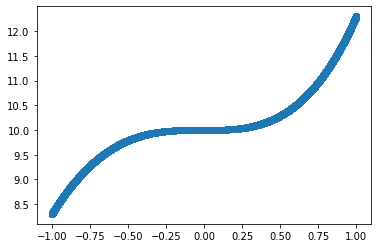

In [17]:
#Case 6
case_six = model1()
case_six.fit(x_train, y_train, epochs = 20, batch_size = 12, validation_data = (x_valid,y_valid))
xpredict = case_six.predict(x_test) #.reshape(16800)
plt.scatter(x_test,y_test)

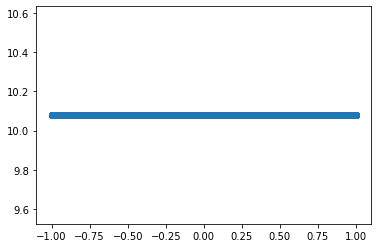

In [18]:
plt.scatter(x_test,xpredict.reshape(16800))

In [19]:
y_test=y_test.to_numpy()
y_test=y_test.reshape(16800)
mae(y_test, xpredict.reshape(16800)),mse(y_test, xpredict.reshape(16800)),rmse(y_test,xpredict.reshape(16800)),r2_square(y_test,xpredict.reshape(16800))

(0.5218000287342237,
 0.583968407957284,
 0.7641782566635117,
 -6.358562047981131e-05)

Epoch 1/20
750/750 [==============================] - 1s 1ms/step - loss: 32.6241 - mse: 32.6241 - val_loss: 0.1087 - val_mse: 0.1087
Epoch 2/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0821 - mse: 0.0821 - val_loss: 0.0693 - val_mse: 0.0693
Epoch 3/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0587 - mse: 0.0587 - val_loss: 0.0486 - val_mse: 0.0486
Epoch 4/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0439 - mse: 0.0439 - val_loss: 0.0397 - val_mse: 0.0397
Epoch 5/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0380 - mse: 0.0380 - val_loss: 0.0354 - val_mse: 0.0354
Epoch 6/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0331 - mse: 0.0331 - val_loss: 0.0292 - val_mse: 0.0292
Epoch 7/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 8/20
750/750 [==============================] - 1s 1ms/step - loss: 

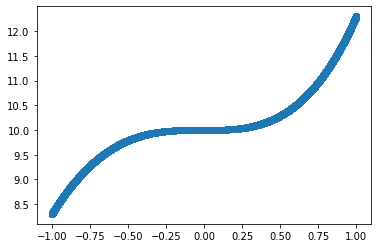

In [21]:
#Case 7
case_seven = model2()
case_seven.fit(x_train, y_train, epochs = 20, batch_size = 12, validation_data = (x_valid,y_valid))
xpredict = case_seven.predict(x_test) #.reshape(16800)
plt.scatter(x_test,y_test)

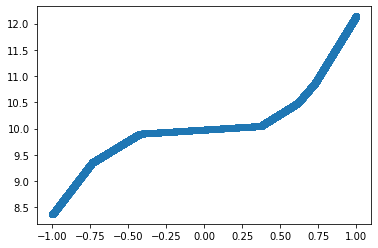

In [22]:
plt.scatter(x_test,xpredict.reshape(16800))

In [23]:
#y_test=y_test.to_numpy()
y_test=y_test.reshape(16800)
mae(y_test, xpredict.reshape(16800)),mse(y_test, xpredict.reshape(16800)),rmse(y_test,xpredict.reshape(16800)),r2_square(y_test,xpredict.reshape(16800))

(0.026009273731939474,
 0.0010950007879911568,
 0.03309079612205117,
 0.9981247779856341)

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 39.2071 - mse: 39.2071 - val_loss: 14.5061 - val_mse: 14.5061
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 7.3146 - mse: 7.3146 - val_loss: 2.7559 - val_mse: 2.7559
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 1.3980 - mse: 1.3980 - val_loss: 0.7025 - val_mse: 0.7025
Epoch 4/20
750/750 [==============================] - 1s 1ms/step - loss: 0.6082 - mse: 0.6082 - val_loss: 0.5611 - val_mse: 0.5611
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 0.4542 - mse: 0.4542 - val_loss: 0.2855 - val_mse: 0.2855
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 0.2317 - mse: 0.2317 - val_loss: 0.1872 - val_mse: 0.1872
Epoch 7/20
750/750 [==============================] - 1s 1ms/step - loss: 0.1546 - mse: 0.1546 - val_loss: 0.1121 - val_mse: 0.1121
Epoch 8/20
750/750 [==============================] - 1s 1ms/step - loss

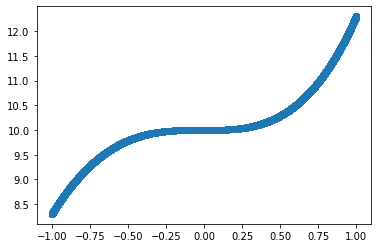

In [25]:
#Case 8
case_eight = model3()
case_eight.fit(x_train, y_train, epochs = 20, batch_size = 12, validation_data = (x_valid,y_valid))
xpredict = case_eight.predict(x_test) #.reshape(16800)
plt.scatter(x_test,y_test)

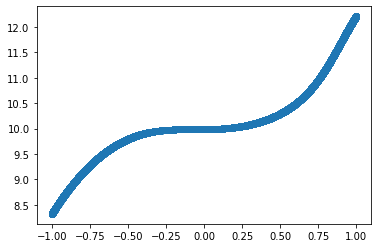

In [26]:
plt.scatter(x_test,xpredict.reshape(16800))

In [27]:
#y_test=y_test.to_numpy()
y_test=y_test.reshape(16800)
mae(y_test, xpredict.reshape(16800)),mse(y_test, xpredict.reshape(16800)),rmse(y_test,xpredict.reshape(16800)),r2_square(y_test,xpredict.reshape(16800))

(0.008793611882989522,
 0.00015771711923772086,
 0.012558547656386101,
 0.9997299046564345)

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 94.7347 - mse: 94.7347 - val_loss: 88.0758 - val_mse: 88.0758
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 81.1508 - mse: 81.1508 - val_loss: 75.2108 - val_mse: 75.2108
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 68.9809 - mse: 68.9809 - val_loss: 63.6538 - val_mse: 63.6538
Epoch 4/20
750/750 [==============================] - 1s 1ms/step - loss: 58.0526 - mse: 58.0526 - val_loss: 53.2821 - val_mse: 53.2821
Epoch 5/20
750/750 [==============================] - 1s 1ms/step - loss: 48.2626 - mse: 48.2626 - val_loss: 44.0077 - val_mse: 44.0077
Epoch 6/20
750/750 [==============================] - 1s 1ms/step - loss: 39.5368 - mse: 39.5368 - val_loss: 35.7694 - val_mse: 35.7694
Epoch 7/20
750/750 [==============================] - 1s 1ms/step - loss: 31.8188 - mse: 31.8188 - val_loss: 28.5146 - val_mse: 28.5146
Epoch 8/20
750/750 [============================

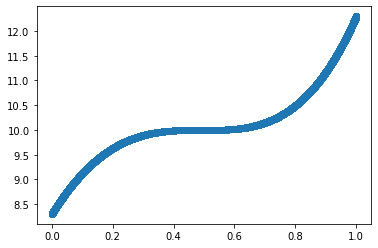

In [37]:
#Case 9
case_nine = model1()
case_nine.fit(x_train, y_train, epochs = 20, batch_size = 12, validation_data = (x_valid,y_valid))
xpredict = case_nine.predict(x_test) #.reshape(16800)
plt.scatter(x_test,y_test)

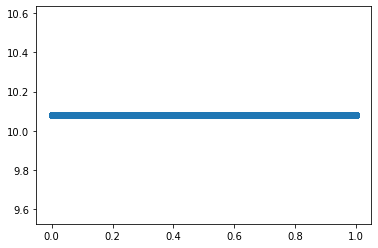

In [38]:
plt.scatter(x_test,xpredict.reshape(16800))

In [40]:
y_test=y_test.to_numpy()
y_test=y_test.reshape(16800)
mae(y_test, xpredict.reshape(16800)),mse(y_test, xpredict.reshape(16800)),rmse(y_test,xpredict.reshape(16800)),r2_square(y_test,xpredict.reshape(16800))

(0.519155573093052,
 0.5817866130474545,
 0.7627493776119745,
 -9.141800834444602e-05)

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 42.9070 - mse: 42.9070 - val_loss: 18.9449 - val_mse: 18.9449
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 9.8881 - mse: 9.8881 - val_loss: 4.1678 - val_mse: 4.1678
Epoch 3/20
750/750 [==============================] - 1s 1ms/step - loss: 2.0041 - mse: 2.0041 - val_loss: 0.9307 - val_mse: 0.9307
Epoch 4/20
750/750 [==============================] - 1s 1ms/step - loss: 0.6613 - mse: 0.6613 - val_loss: 0.5929 - val_mse: 0.5929
Epoch 5/20
750/750 [==============================] - 1s 1ms/step - loss: 0.5639 - mse: 0.5639 - val_loss: 0.5786 - val_mse: 0.5786
Epoch 6/20
750/750 [==============================] - 1s 1ms/step - loss: 0.5563 - mse: 0.5563 - val_loss: 0.5616 - val_mse: 0.5616
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 0.3161 - mse: 0.3161 - val_loss: 0.1975 - val_mse: 0.1975
Epoch 8/20
750/750 [==============================] - 1s 2ms/step - loss

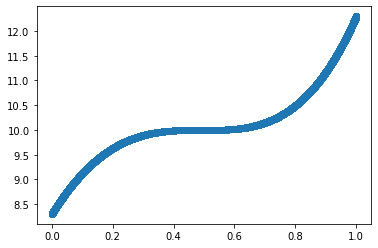

In [42]:
#Case 10
case_ten = model3()
case_ten.fit(x_train, y_train, epochs = 20, batch_size = 12, validation_data = (x_valid,y_valid))
xpredict = case_ten.predict(x_test) #.reshape(16800)
plt.scatter(x_test,y_test)

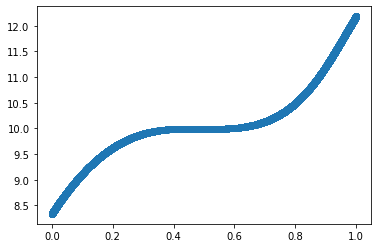

In [43]:
plt.scatter(x_test,xpredict.reshape(16800))

In [44]:
#y_test=y_test.to_numpy()
y_test=y_test.reshape(16800)
mae(y_test, xpredict.reshape(16800)),mse(y_test, xpredict.reshape(16800)),rmse(y_test,xpredict.reshape(16800)),r2_square(y_test,xpredict.reshape(16800))

(0.012154353090742955,
 0.0003146227935195545,
 0.01773760957737977,
 0.9994591632934616)